In [8]:
# Import Libraries
from init import *  # Adds project root to sys.path
from src import config

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data
train = config.pd.read_csv(config.DATA_PATH + 'raw/train.csv')
test = config.pd.read_csv(config.DATA_PATH + 'raw/test.csv')

In [3]:
def preprocess(df: pd.DataFrame, is_train: bool = True) -> pd.DataFrame:
    """
    Preprocesses the input DataFrame by applying minimal cleaning and feature engineering.

    Args:
        df (pd.DataFrame): The input raw dataframe (train or test).
        is_train (bool): Flag to indicate if the data is training data.

    Returns:
        pd.DataFrame: Processed dataframe ready for modeling.
    """
    # Work on a copy to avoid mutating original
    df = df.copy()

    # Drop 'id' column if present (not a predictive feature)
    if 'id' in df.columns:
        df.drop(columns=['id'], inplace=True)

    # Encode 'Sex' column: male → 1, female → 0
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

    # === Feature Engineering ===

    # Body Mass Index
    df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

    # Square of duration (nonlinear transformation)
    df['Duration_squared'] = df['Duration'] ** 2

    # Interaction: Duration × Weight
    df['Duration_Weight'] = df['Duration'] * df['Weight']

    # Interaction: Duration × Heart Rate
    df['Duration_HeartRate'] = df['Duration'] * df['Heart_Rate']

    # Ratio: Weight to Height
    df['Weight_Height_Ratio'] = df['Weight'] / df['Height']

    # Ratio: Heart rate per minute
    df['HR_per_min'] = df['Heart_Rate'] / df['Duration']

    # Binning: Categorize 'Age' into groups
    df['Age_Group'] = pd.cut(
        df['Age'],
        bins=[0, 30, 50, 70, 100],
        labels=['Young', 'Adult', 'Mid-Age', 'Senior']
    )

    # One-hot encode 'Age_Group' and drop first to avoid multicollinearity
    df = pd.get_dummies(df, columns=['Age_Group'], drop_first=True)

    return df

In [ ]:
# Apply preprocessing
X_train_fe = preprocess(train)
X_test_fe = preprocess(test)

# Align test columns with train (drop 'Calories' before alignment)
X_test_fe = X_test_fe.reindex(columns=X_train_fe.columns.drop('Calories'), fill_value=0)

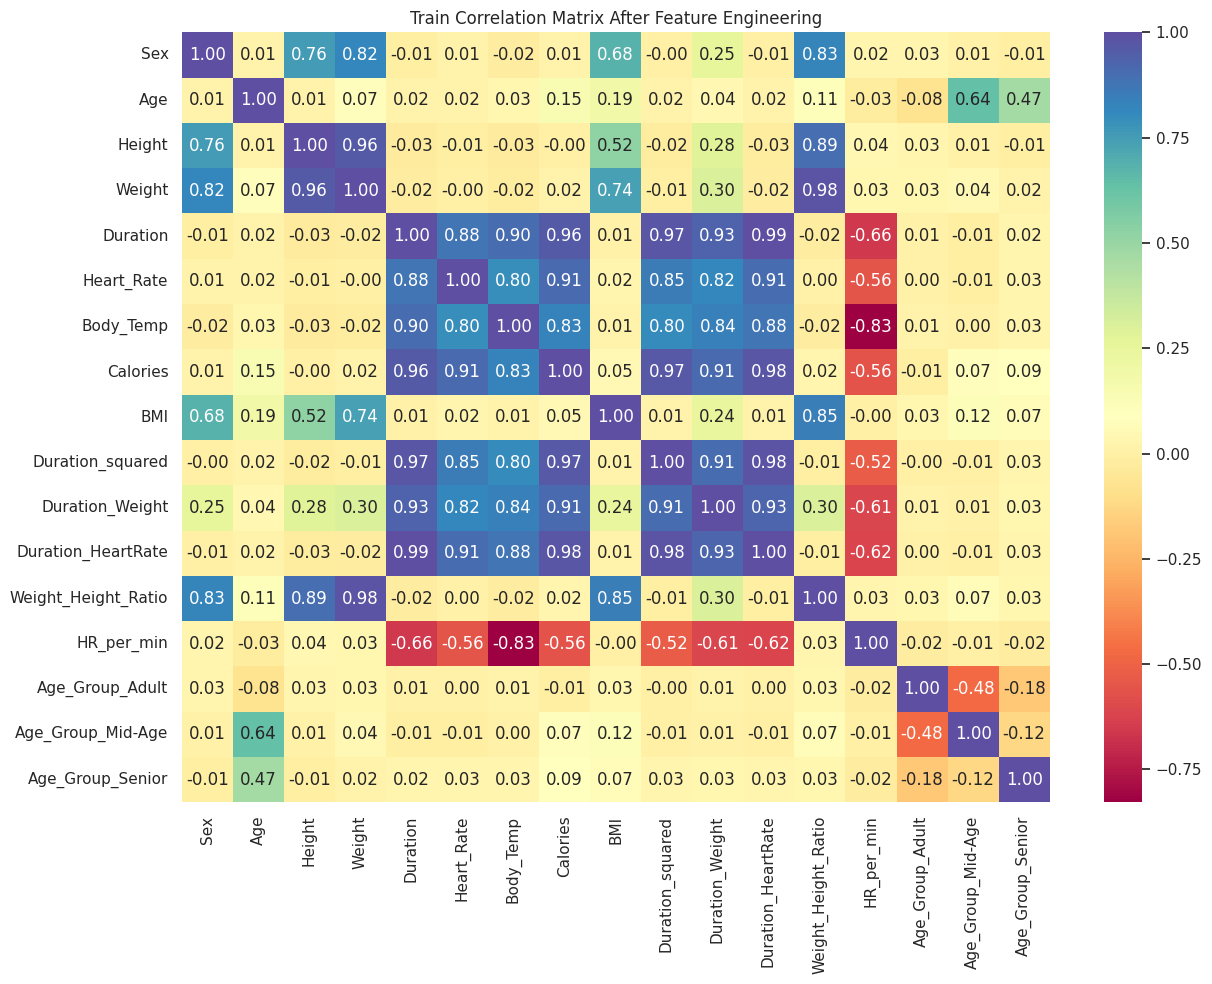

In [12]:
# Plot correlation for train
plt.figure(figsize=(14, 10))
sns.heatmap(X_train_fe.corr(numeric_only=True), annot=True, cmap="Spectral", fmt=".2f")
plt.title("Train Correlation Matrix After Feature Engineering")
plt.show()

In [ ]:
# Save to pickle for reuse
X_train_fe.to_pickle(config.DATA_PATH + "processed/X_train_fe.pkl")
X_test_fe.to_pickle(config.DATA_PATH + "processed/X_test_feS.pkl")
print("✅ Processed data saved as Pickle files.")

✅ Processed data saved as Pickle files.
